<center><img src="../../../images/k_nearest_neighbour.png" alt="error" width="1000"/></center>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [2]:
data = pd.read_csv('../../../datasets/RidingMowers.csv')
data.head()

,Income,Lot_Size,Response
0,34,26,Not Bought
1,34,40,Not Bought
2,34,46,Not Bought
3,34,48,Not Bought
4,34,53,Not Bought


In [3]:
data.isna().sum()

Income      0
Lot_Size    0
Response    0
dtype: int64

<Axes: xlabel='Income', ylabel='Lot_Size'>

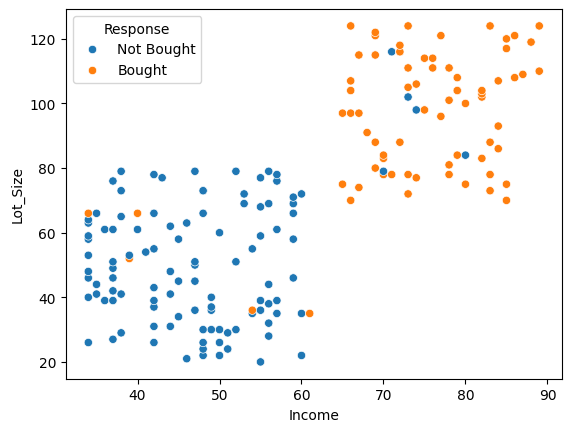

In [4]:
sns.scatterplot(x=data['Income'],y=data['Lot_Size'],hue=data['Response'])

we can see some outliers and min-max-scaler is better option for scaling KNN model if there are no outliers so we will use standardsclaer for now  

In [5]:
data.head()

,Income,Lot_Size,Response
0,34,26,Not Bought
1,34,40,Not Bought
2,34,46,Not Bought
3,34,48,Not Bought
4,34,53,Not Bought


In [6]:
x = data.drop(columns='Response')
y = data['Response']

In [7]:
scaler = StandardScaler() # as we only have two columns with small data size scaling might not have huge impact 
x = scaler.fit_transform(x)

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=23,shuffle=True,stratify=y)

In [9]:
model = KNeighborsClassifier()

In [10]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
y_pred = model.predict(x_test)

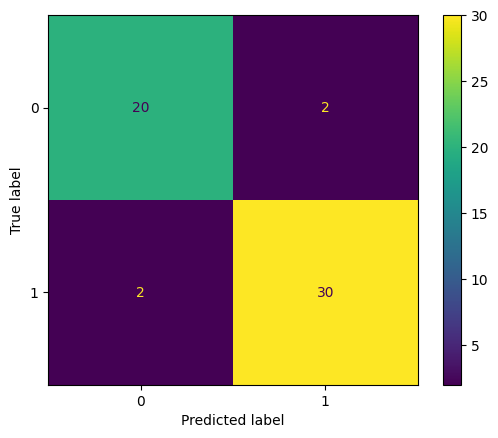

In [12]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Bought       0.91      0.91      0.91        22
  Not Bought       0.94      0.94      0.94        32

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



In [14]:
accuracy_score(y_test,y_pred)

0.9259259259259259

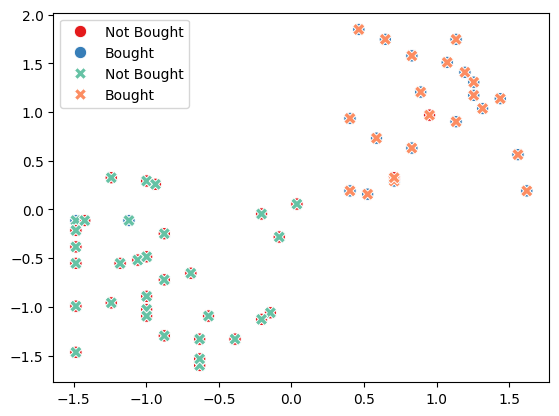

In [15]:
# Plot actual test values with one color palette
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_test, palette='Set1', s=80, marker='o')

# Overlay predicted values with another color palette
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_pred, palette='Set2', s=80, marker='X')

# Modify legend to show labels for both hue mappings
plt.legend()
plt.show()


if we look closely some points are misclassified during predictions , the misclassifed points seems to be outlers we seen earlier because KNN uses distance method they are classifying points depends on points closer to them.

<center><img src="../../../images/Knn_outliers.png" alt="error" width="600"/></center>